In [2]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing

In [3]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [8]:
X['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
states = pd.get_dummies(X['State'], drop_first=True)

In [10]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [12]:
X = pd.concat([X, states], axis=1)

In [13]:
X.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,1
1,162597.70,151377.59,443898.53,California,0,0
2,153441.51,101145.55,407934.54,Florida,1,0
3,144372.41,118671.85,383199.62,New York,0,1
4,142107.34,91391.77,366168.42,Florida,1,0


In [15]:
X = X.drop('State', axis=1)

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


## Multiple Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_predict = lin_reg.predict(X_test)

#### R squared value for accuracy check

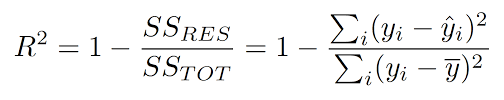

In [21]:
from sklearn.metrics import r2_score

In [22]:
score = r2_score(y_test, y_predict)

In [24]:
print(score)  ## A score closer to 1 means a good model

0.9347068473282424


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

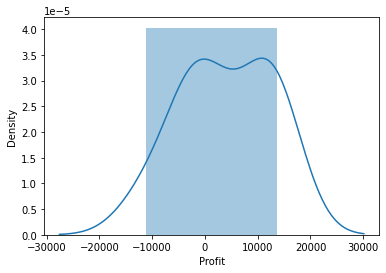

In [30]:
sns.distplot(y_test-y_predict)

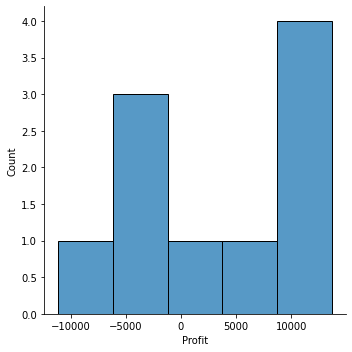

In [28]:
sns.displot(y_test-y_predict)